In [14]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
# Use Pandas to read data
clean_data = "clean_data.csv"
clean_data_df = pd.read_csv(clean_data)
clean_data_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
0,75,0,190,80,91,193,371,174,121,-16,63,8,0
1,56,1,165,64,81,174,401,149,39,25,53,6,0
2,54,0,172,95,138,163,386,185,102,96,75,10,0
3,55,0,175,94,100,202,380,179,143,28,71,1,1
4,75,0,190,80,88,181,360,177,103,-16,0,7,0


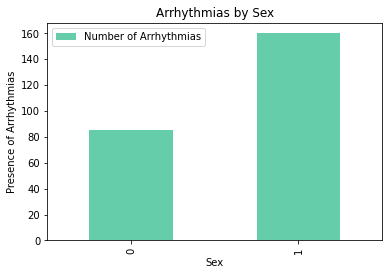

In [26]:
# Using GroupBy in order to separate the data into fields according to "sex" values
grouped_sex_df = clean_data_df.groupby(['sex'])
sex_presence = grouped_sex_df["arr_diagnosis"].sum()
# Creating a new DataFrame using presence
sex_summary_df = pd.DataFrame({"Number of Arrhythmias": sex_presence})
# Chart our data, give it a title, and label the axes
sex_chart = sex_summary_df.plot(kind="bar", title="Arrhythmias by Sex", color='mediumaquamarine')
sex_chart.set_xlabel("Sex")
sex_chart.set_ylabel("Presence of Arrhythmias")

plt.savefig("images/gender_hist.png")

plt.show()


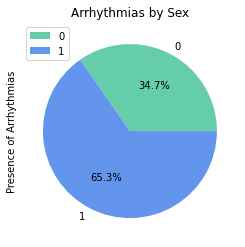

In [27]:
colors = ["mediumaquamarine", "cornflowerblue"]
# Create a pie chart based upon the arrhythmia presence for each sex
sex_pie = sex_summary_df.plot(kind="pie", y='Number of Arrhythmias', title=("Arrhythmias by Sex"), colors=colors, autopct="%1.1f%%")
sex_pie.set_ylabel("Presence of Arrhythmias")

plt.savefig("images/gender_pie.png")

plt.show()

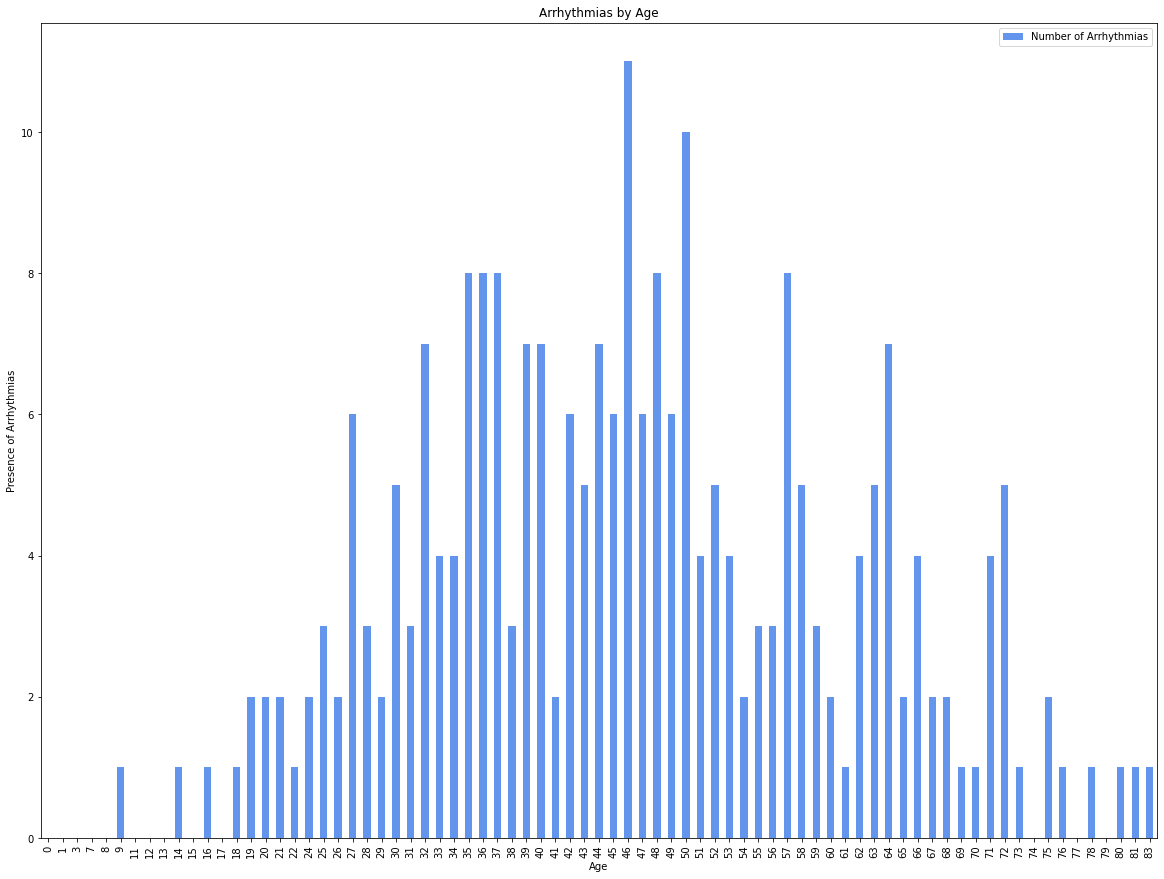

In [28]:
# Using GroupBy in order to separate the data into fields according to "age" values
grouped_age_df = clean_data_df.groupby(['age'])
age_presence = grouped_age_df["arr_diagnosis"].sum()
age_summary_df = pd.DataFrame({"Number of Arrhythmias": age_presence})
# Chart our data, give it a title, and label the axes
age_chart = age_summary_df.plot(kind="bar", title="Arrhythmias by Age", color='cornflowerblue', figsize=(20,15))
age_chart.set_xlabel("Age")
age_chart.set_ylabel("Presence of Arrhythmias")

plt.savefig("images/age_bar.png")

plt.show()

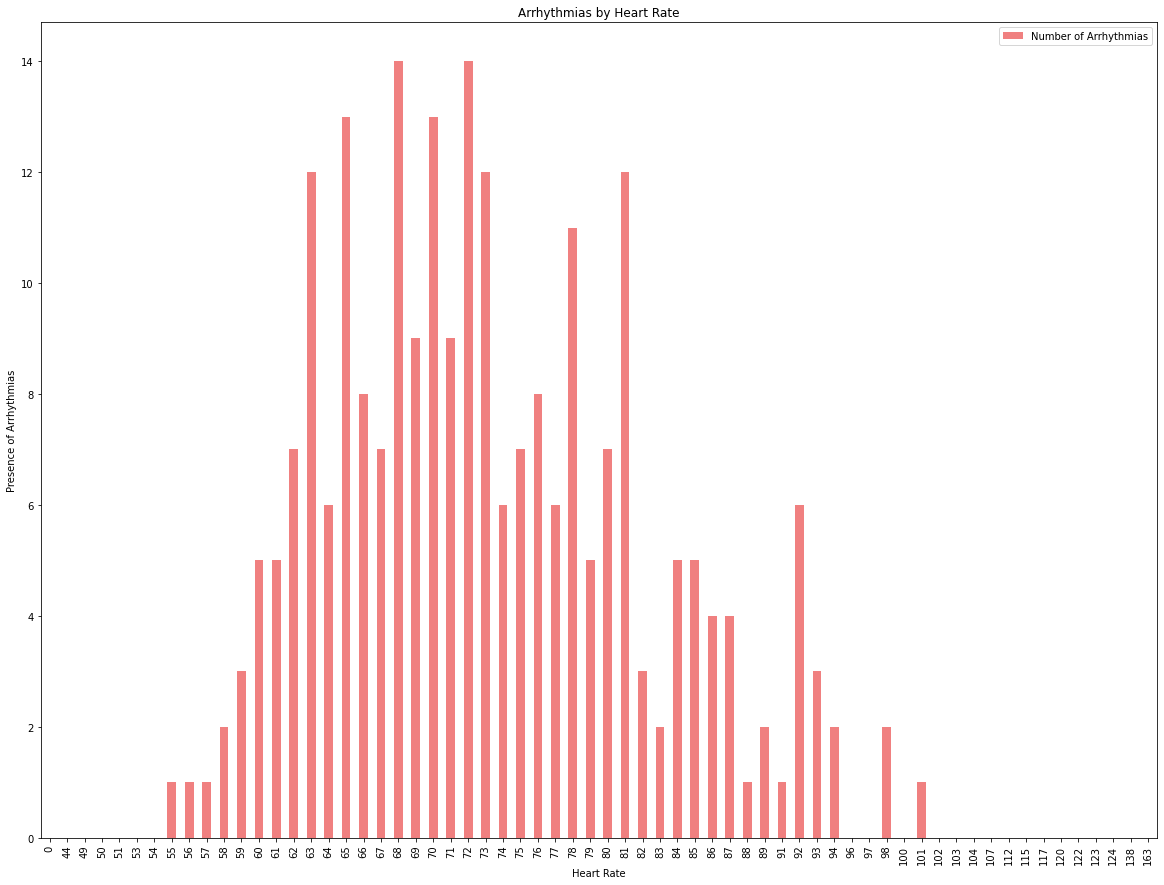

In [29]:
# Using GroupBy in order to separate the data into fields according to "heart rate" values
grouped_rate_df = clean_data_df.groupby(['heart_rate'])
rate_presence = grouped_rate_df["arr_diagnosis"].sum()
rate_summary_df = pd.DataFrame({"Number of Arrhythmias": rate_presence})
# Chart our data, give it a title, and label the axes
rate_chart = rate_summary_df.plot(kind="bar", title="Arrhythmias by Heart Rate", color='lightcoral', figsize=(20,15))
rate_chart.set_xlabel("Heart Rate")
rate_chart.set_ylabel("Presence of Arrhythmias")

plt.savefig("images/hr_bar.png")
plt.show()

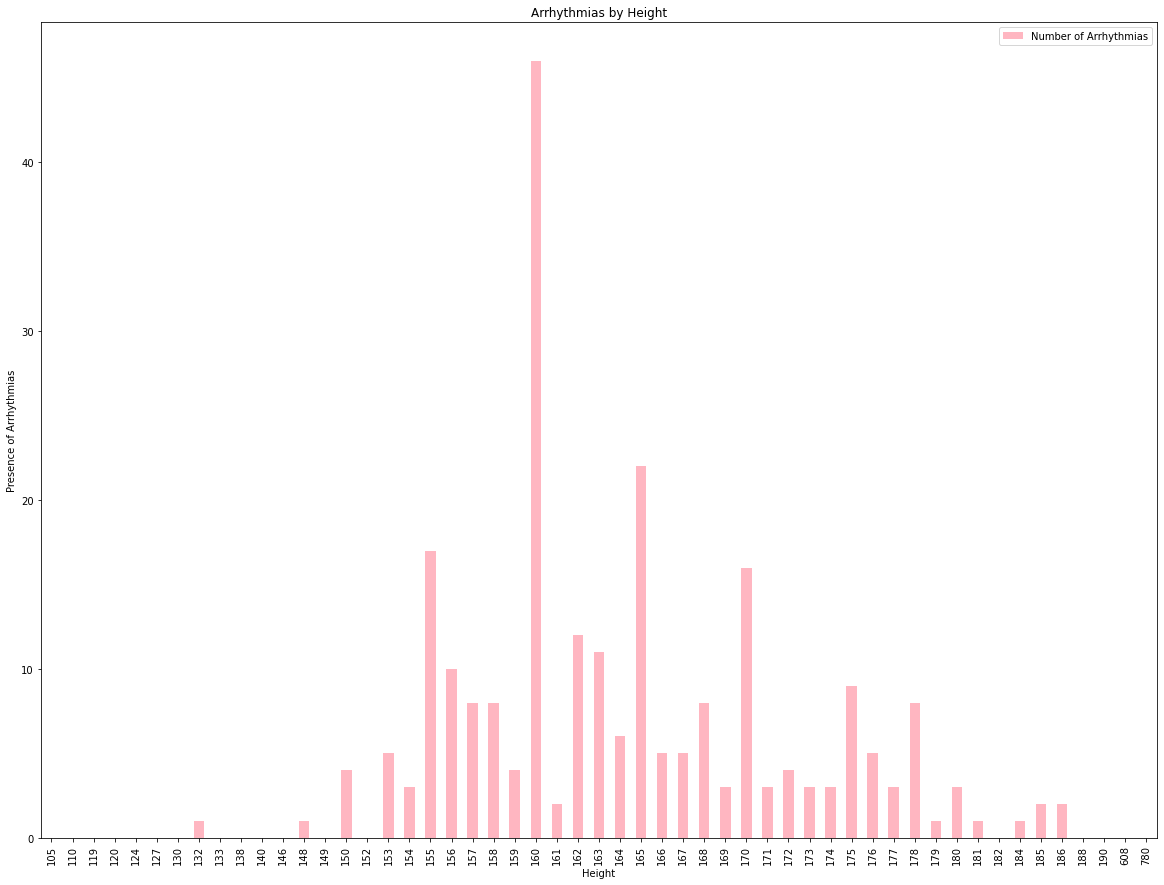

In [30]:
# Using GroupBy in order to separate the data into fields according to "height" values
grouped_height_df = clean_data_df.groupby(['height'])
height_presence = grouped_height_df["arr_diagnosis"].sum()
height_summary_df = pd.DataFrame({"Number of Arrhythmias": height_presence})
# Chart our data, give it a title, and label the axes
height_chart = height_summary_df.plot(kind="bar", title="Arrhythmias by Height", color='lightpink', figsize=(20,15))
height_chart.set_xlabel("Height")
height_chart.set_ylabel("Presence of Arrhythmias")

plt.savefig("images/height_bar.png")
plt.show()

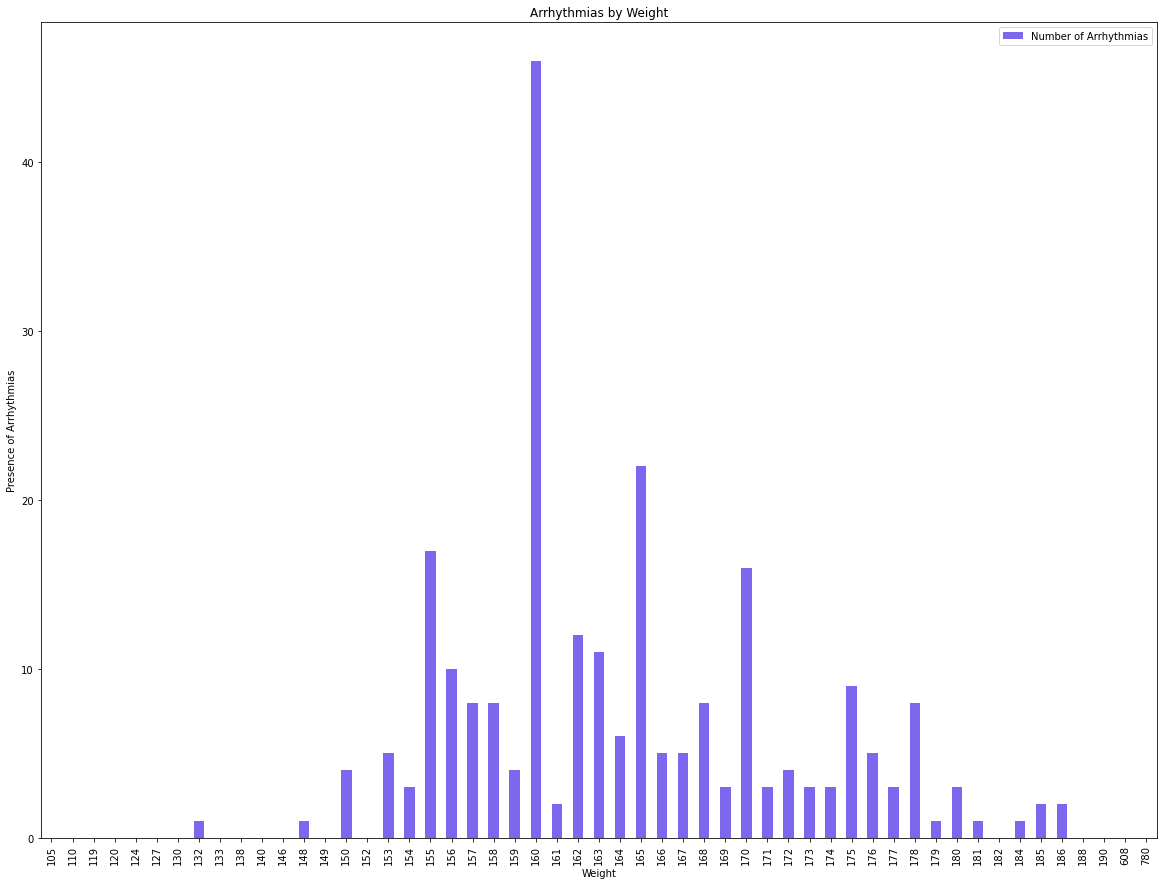

In [31]:
# Using GroupBy in order to separate the data into fields according to "height" values
grouped_weight_df = clean_data_df.groupby(['weight'])
weight_presence = grouped_weight_df["arr_diagnosis"].sum()
weight_summary_df = pd.DataFrame({"Number of Arrhythmias": weight_presence})
# Chart our data, give it a title, and label the axes
weight_chart = height_summary_df.plot(kind="bar", title="Arrhythmias by Weight", color='mediumslateblue', figsize=(20,15))
weight_chart.set_xlabel("Weight")
weight_chart.set_ylabel("Presence of Arrhythmias")

plt.savefig("images/weight_bar.png")
plt.show()

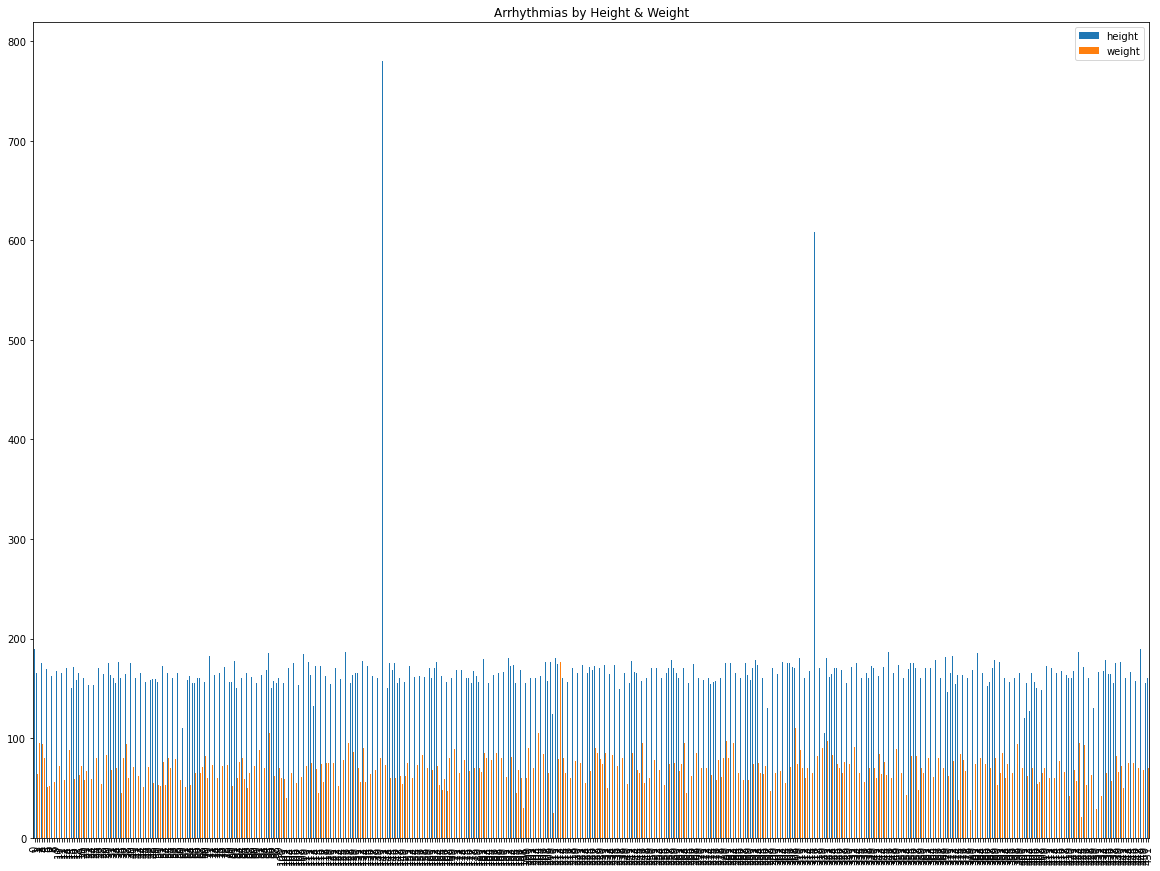

In [60]:
data = clean_data_df[['height', 'weight']]
#df=pd.DataFrame(clean_data_df[['height', 'weight']],columns=["Height","Weight"])
data.plot(kind="bar", title="Arrhythmias by Height & Weight", figsize=(20,15))
plt.show()

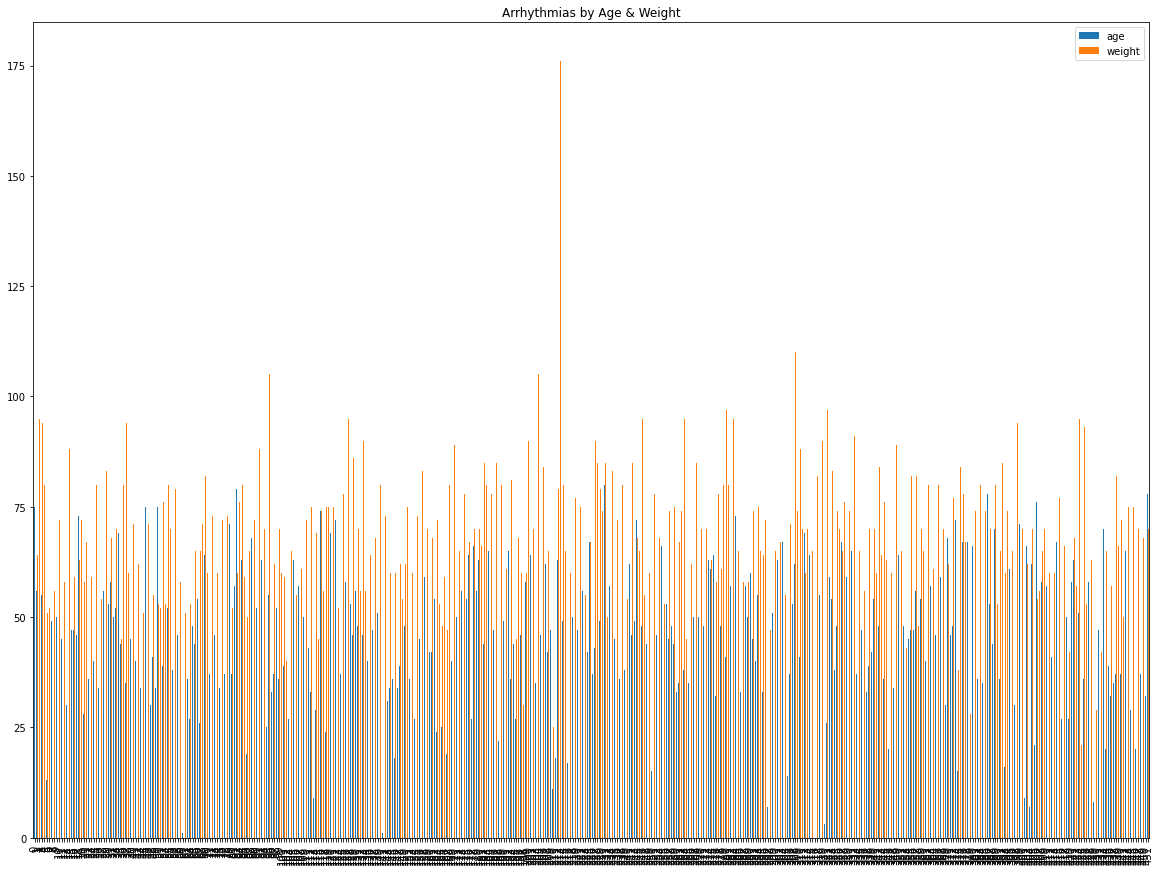

In [59]:
data = clean_data_df[['age', 'weight']]
#df=pd.DataFrame(clean_data_df[['height', 'weight']],columns=["Height","Weight"])
data.plot(kind="bar", title="Arrhythmias by Age & Weight", figsize=(20,15))
plt.show()

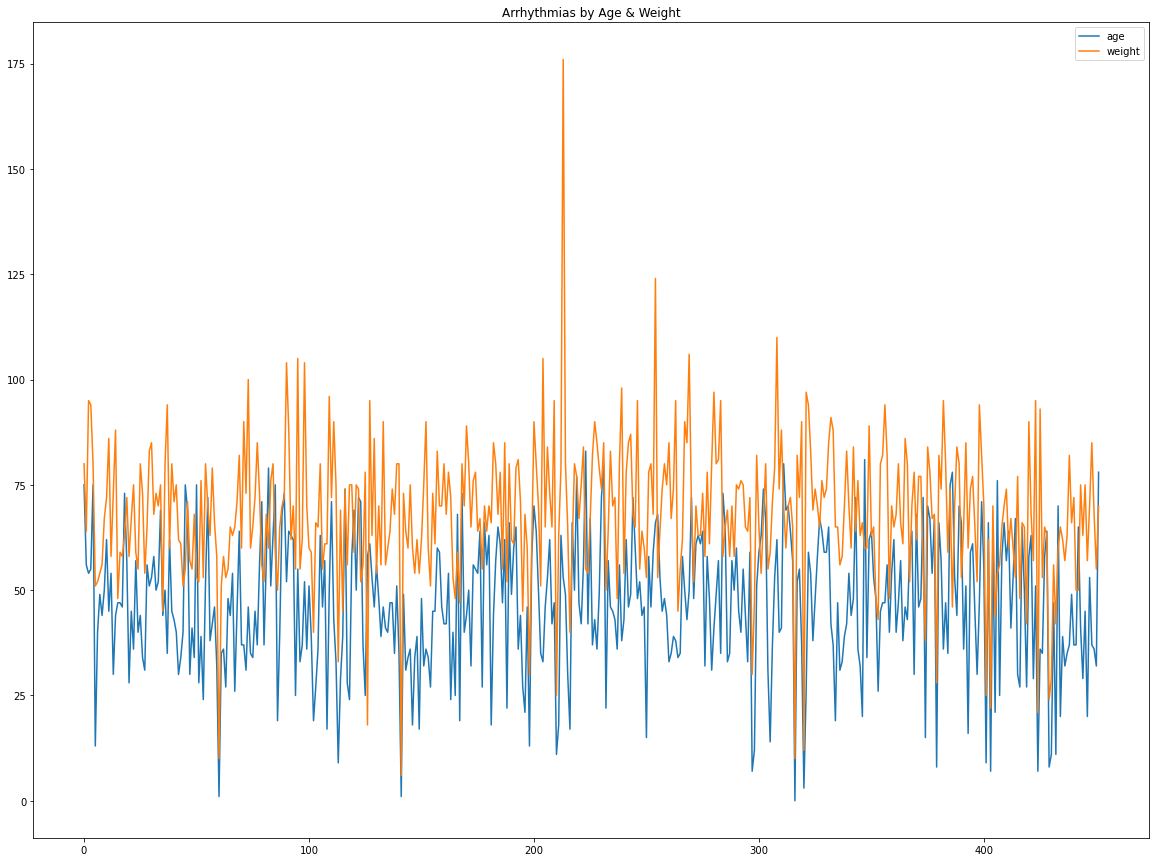

In [65]:
data = clean_data_df[['age', 'weight']]
#df=pd.DataFrame(clean_data_df[['height', 'weight']],columns=["Height","Weight"])
data.plot(kind="line", title="Arrhythmias by Age & Weight", figsize=(20,15))
plt.show()